In [32]:
import mdtraj as md
import numpy as np

import re
import numpy
from tqdm import tqdm
from pathlib import Path
import os
from natsort import natsorted
from itertools import product
import optuna 
from addict import Dict as Adict
    
import pandas as pd

from pyemma.coordinates import source
import pyemma as pm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
study_name = 'markovlag_100ns'
storage_name = 'sqlite:///data/dunbrack_msm.db'
study = optuna.load_study(study_name=study_name, storage=storage_name)
study.trials_dataframe().to_hdf(f'data/{study_name}.h5', key='random_trials')

In [25]:
trials = pd.read_hdf(f'data/{study_name}.h5', key='random_trials')
rename_cols = {'params_n_clusters' : 'n_clusters',
               'params_tica_dim' : 'tica_dim',
               'params_tica_lag' : 'tica_lag',
               'values_0' : 't2',
               'values_1' : 't3',
               'values_2' : 'gap23',
               'values_3' : 'gap34'}
trials.rename(columns=rename_cols, inplace=True)
trials.dropna(inplace=True)
trials

,number,t2,t3,gap23,gap34,datetime_start,datetime_complete,duration,n_clusters,tica_dim,tica_lag,state
0,0,38169.423262,3628.613020,11.229864,1.250599,2024-01-30 14:51:45.431018,2024-01-30 15:07:43.095742,0 days 00:15:57.664724,472,2,93,COMPLETE
1,1,39517.565918,3405.009637,11.312901,1.200764,2024-01-30 15:07:43.137162,2024-01-30 15:36:33.781196,0 days 00:28:50.644034,948,2,50,COMPLETE
2,2,109958.911925,70727.777530,1.453740,1.190137,2024-01-30 15:36:33.812543,2024-01-30 16:03:41.958975,0 days 00:27:08.146432,863,9,25,COMPLETE
3,3,60681.717082,42101.934131,1.366197,1.265861,2024-01-30 16:03:41.987596,2024-01-30 16:16:19.999398,0 days 00:12:38.011802,373,8,42,COMPLETE
4,4,28681.515798,19932.345379,1.457380,1.229801,2024-01-30 16:16:20.033865,2024-01-30 16:25:02.313256,0 days 00:08:42.279391,136,5,45,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,162045.593309,77780.796181,1.582507,1.322412,2024-02-02 10:40:21.855122,2024-02-02 11:02:21.325174,0 days 00:21:59.470052,666,10,100,COMPLETE
96,96,50929.647033,35274.882732,1.435696,2.761773,2024-02-02 11:02:21.356776,2024-02-02 11:26:35.141977,0 days 00:24:13.785201,855,4,65,COMPLETE
97,97,61913.887801,43777.074487,1.617697,1.246860,2024-02-02 11:26:35.174885,2024-02-02 11:35:00.011574,0 days 00:08:24.836689,184,10,70,COMPLETE
98,98,55145.031153,42604.282834,1.286777,2.215405,2024-02-02 11:35:00.033735,2024-02-02 12:00:38.254982,0 days 00:25:38.221247,814,5,74,COMPLETE


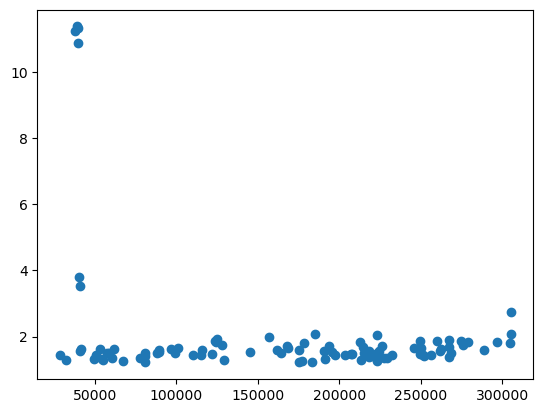

In [27]:
t2 = trials.t2.to_numpy()
gap23 = trials.gap23.to_numpy()
plt.scatter(t2,gap23)

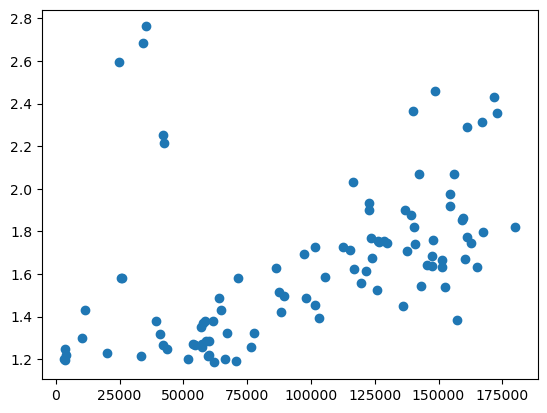

In [29]:
t3 = trials.t3.to_numpy()
gap34 = trials.gap34.to_numpy()
plt.scatter(t3,gap34)

In [113]:
hp_df['cluster__maxiter']=1000
hp_df['cluster__stride']=100
Z

In [117]:
hp_df = hp_df[['trial__no', 'trajlen__cutoff', 'tica__lag', 'tica__dim', 'tica__stride', 'cluster__k', 'cluster__maxiter', 'cluster__stride']]

In [121]:
hp_df.to_hdf(f'data/{study_name}.h5', key='random_trials_hps')